## Analysis of the Irish Research Funding Landscape from 2001-2021

In [3]:
from datetime import date

In [4]:
#Date:
print(date.today())

2021-11-23


In [391]:
# Import dataframes
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt

Step 1. Import Data-saved locally from govdata.ie 

In [392]:
#import local csv file
pd.read_csv(r'C:\Users\orla.finucane\Desktop\UCD Data Analytics Project 2021\2. Data Sets\Awards.csv')

,Proposal ID,Programme Name,Sub-Programme,Supplement,Lead Applicant,Research Body,Proposal Title,Start Date,End Date,Funding
0,11/PI/1005,SFI Principal Investigator Programme,NaN,NaN,Cormac Taylor,University College Dublin (UCD),Regulation of inflammatory gene expression dur...,06/01/2012,5/31/2018,1151739.0
1,11/PI/1014,SFI Principal Investigator Programme,NaN,NaN,Marina Lynch,Trinity College Dublin (TCD),Modulating microglial function and its impact ...,10/01/2012,12/31/2016,1483870.0
2,11/PI/1020,SFI Principal Investigator Programme,NaN,NaN,Uri Frank,"National University of Ireland, Galway (NUIG)",Stem cell fate in Hydractinia: a marine cnidarian,09/01/2012,12/31/2018,984519.0
3,11/PI/1026,SFI Principal Investigator Programme,NaN,NaN,James Gleeson,University of Limerick (UL),Modelling dynamics on complex networks,04/01/2012,9/30/2016,738481.0
4,11/PI/1027,SFI Principal Investigator Programme,NaN,NaN,Finbarr O'Sullivan,University College Cork (UCC),Statistical Methods for Molecular Imaging of C...,10/01/2012,5/31/2019,1427771.0
...,...,...,...,...,...,...,...,...,...,...
6003,13/RC/2092_P2s,SFI Research Centres Programme,Phase 2,Maternity / Adoptive Allowance,Murray Hitzman,University College Dublin (UCD),Centralised EPE Support to the SFI Research Ce...,01/01/2021,12/31/2026,1586000.0
6004,13/RC/2092_P2s2,SFI Research Centres Programme,Phase 2,Maternity / Adoptive Allowance,Murray Hitzman,University College Dublin (UCD),Centralised Communications Support to the SFI ...,01/01/2021,12/31/2026,507000.0
6005,15/SIRG/3429(T)s3,SFI Starting Investigator Research Grant,NaN,Maternity / Adoptive Allowance,Susan Kelleher,University College Dublin (UCD),Polymeric nanoneedle arrays for injecting drug...,10/25/2020,2/24/2021,12130.0
6006,16/RC/3872s2,SFI Research Centres Programme,Phase 1,Maternity / Adoptive Allowance,Denis Dowling,University College Dublin (UCD),I-Form Advanced Manufacturing Research Centre,01/05/2021,07/04/2021,31764.0


In [393]:
# Define file
All_Awards = pd.read_csv(r'C:\Users\orla.finucane\Desktop\UCD Data Analytics Project 2021\2. Data Sets\Awards.csv')

Step 2. Inspect and Clean Data

In [394]:
#Inspect Data for number of columns and rows and data type
All_Awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Proposal ID     6007 non-null   object 
 1   Programme Name  6007 non-null   object 
 2   Sub-Programme   1014 non-null   object 
 3   Supplement      494 non-null    object 
 4   Lead Applicant  6007 non-null   object 
 5   Research Body   6007 non-null   object 
 6   Proposal Title  6006 non-null   object 
 7   Start Date      6007 non-null   object 
 8   End Date        6007 non-null   object 
 9   Funding         6007 non-null   float64
dtypes: float64(1), object(9)
memory usage: 469.5+ KB


In [395]:
All_Awards['Start Date'] = pd.to_datetime(All_Awards['Start Date'])

In [396]:
All_Awards['End Date'] = pd.to_datetime(All_Awards['End Date'])

In [397]:
#Average lenght of each Award-new column
All_Awards['diff_years'] = All_Awards['End Date'] - All_Awards['Start Date']

In [398]:
All_Awards['diff_years'] = All_Awards['diff_years']/np.timedelta64(1,'Y')

In [399]:
AverageAwardLenght = All_Awards['diff_years'].mean() 
print("Average Length of each Award in Years is",AverageAwardLenght)

Average Length of each Award in Years is 2.242253314148486


In [400]:
# making a new colomn called year and making the date a year only
All_Awards['Year'] = All_Awards['Start Date'].dt.year 

In [401]:
All_Awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Proposal ID     6007 non-null   object        
 1   Programme Name  6007 non-null   object        
 2   Sub-Programme   1014 non-null   object        
 3   Supplement      494 non-null    object        
 4   Lead Applicant  6007 non-null   object        
 5   Research Body   6007 non-null   object        
 6   Proposal Title  6006 non-null   object        
 7   Start Date      6007 non-null   datetime64[ns]
 8   End Date        6007 non-null   datetime64[ns]
 9   Funding         6007 non-null   float64       
 10  diff_years      6007 non-null   float64       
 11  Year            6007 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 563.4+ KB


In [402]:
All_Awards.describe() 

,Funding,diff_years,Year
count,6.007000e+03,6007.000000,6007.000000
mean,5.920493e+05,2.242253,2011.825870
std,2.686232e+06,1.829295,5.239198
min,-5.000001e+06,-0.087613,2001.000000
25%,1.383750e+04,0.501037,2007.000000
50%,1.218150e+05,1.494897,2012.000000
75%,3.054765e+05,3.942586,2016.000000
max,6.362881e+07,9.582675,2021.000000


In [403]:
#Anonymise the data set
All_Awards['Researcher Name'] = 'Researcher' + pd.Series(pd.factorize(All_Awards['Lead Applicant'])[0] + 1).astype(str)

In [404]:
#Check if data has been anonymised
All_Awards.head(4)

,Proposal ID,Programme Name,Sub-Programme,Supplement,Lead Applicant,Research Body,Proposal Title,Start Date,End Date,Funding,diff_years,Year,Researcher Name
0,11/PI/1005,SFI Principal Investigator Programme,NaN,NaN,Cormac Taylor,University College Dublin (UCD),Regulation of inflammatory gene expression dur...,2012-06-01,2018-05-31,1151739.0,5.996016,2012.0,Researcher1
1,11/PI/1014,SFI Principal Investigator Programme,NaN,NaN,Marina Lynch,Trinity College Dublin (TCD),Modulating microglial function and its impact ...,2012-10-01,2016-12-31,1483870.0,4.249232,2012.0,Researcher2
2,11/PI/1020,SFI Principal Investigator Programme,NaN,NaN,Uri Frank,"National University of Ireland, Galway (NUIG)",Stem cell fate in Hydractinia: a marine cnidarian,2012-09-01,2018-12-31,984519.0,6.330041,2012.0,Researcher3
3,11/PI/1026,SFI Principal Investigator Programme,NaN,NaN,James Gleeson,University of Limerick (UL),Modelling dynamics on complex networks,2012-04-01,2016-09-30,738481.0,4.498381,2012.0,Researcher4


In [523]:
# Change the name of some of the Researhc Bodys
All_Awards['Research Body']= All_Awards['Research Body'].replace(['Trinity College Dublin (TCD)', 'University College Dublin (UCD)', 'National University of Ireland, Galway (NUIG)','University College Cork (UCC)','University of Limerick (UL)', 'Dublin City University (DCU)','National University of Ireland, Maynooth (NUIM)', 'Royal College of Surgeons in Ireland (RCSI)',],
                                                               ['TCD','UCD','NUIG','UCC','UL','DCU','NUIM','RCSI'])

In [525]:
All_Awards.head(2)

,Proposal ID,Programme Name,Sub-Programme,Supplement,Lead Applicant,Research Body,Proposal Title,Start Date,End Date,Funding,diff_years,Year,Researcher Name
0,11/PI/1005,SFI Principal Investigator Programme,NaN,NaN,Cormac Taylor,UCD,Regulation of inflammatory gene expression dur...,2012-06-01,2018-05-31,1151739.0,5.996016,2012.0,Researcher1
1,11/PI/1014,SFI Principal Investigator Programme,NaN,NaN,Marina Lynch,TCD,Modulating microglial function and its impact ...,2012-10-01,2016-12-31,1483870.0,4.249232,2012.0,Researcher2


In [526]:
#Remove unwanted columns & define 
CleanAll_Awards= All_Awards.drop(['Supplement','Sub-Programme','Lead Applicant'], axis=1)

In [527]:
#Identify Nulls
CleanAll_Awards.isnull().sum()

Proposal ID        1
Programme Name     1
Research Body      1
Proposal Title     2
Start Date         1
End Date           1
Funding            1
diff_years         1
Year               1
Researcher Name    0
dtype: int64

In [528]:
#Remove nulls
CleanAll_Awards2 = CleanAll_Awards[~CleanAll_Awards['Proposal Title'].isnull()]

In [529]:
CleanAll_Awards2.shape

(6006, 10)

In [530]:
CleanAll_Awards2.isnull().sum()

Proposal ID        1
Programme Name     1
Research Body      1
Proposal Title     0
Start Date         1
End Date           1
Funding            1
diff_years         1
Year               1
Researcher Name    0
dtype: int64

In [531]:
CleanAll_Awards2[~CleanAll_Awards2['Proposal ID'].isnull()].shape

(6005, 10)

In [532]:
CleanAll_Awards3 = CleanAll_Awards2[~CleanAll_Awards2['Proposal ID'].isnull()]

In [533]:
CleanAll_Awards3.isnull().sum()

Proposal ID        0
Programme Name     0
Research Body      0
Proposal Title     0
Start Date         0
End Date           0
Funding            0
diff_years         0
Year               0
Researcher Name    0
dtype: int64

Step 3. Analyse Data

(A) Broad Overview of Funding Landscape & Top 10 Programmes

In [534]:
#Total Amount of funding award to STEM Research in Ireland since 2001
CleanAwardData = CleanAll_Awards3
TotalFunding = CleanAwardData['Funding'].sum()

In [535]:
#Total Number of Programmes supporting STEM in Ireland since 2001
Programmes = CleanAwardData['Programme Name'].nunique()

In [536]:
#Total Number of Researcher supported STEM
Researchers = CleanAwardData['Researcher Name'].nunique()

In [537]:
#Total Number of Research Bodies supported in Ireland since 2001
ResearchBody = CleanAwardData['Research Body'].nunique()

In [538]:
Totals = {'Total Funding': TotalFunding, 'Total Programmes': Programmes,'Total Researchers': Researchers, 'Total Research Bodies': ResearchBody}

In [539]:
#List of Totals
Totals

{'Total Funding': 3554258023.0,
 'Total Programmes': 64,
 'Total Researchers': 2060,
 'Total Research Bodies': 118}

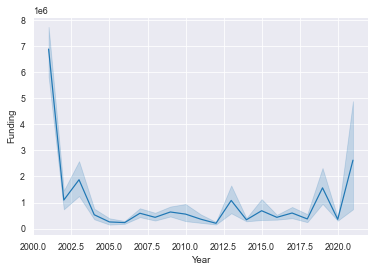

In [540]:
# Visualise the amount of funding over time using seaborn
AllFundingOverTime = sns.lineplot(x='Year', y ='Funding', data = CleanAwardData)

In [541]:
#Top 10 Funding Programmes
TopProgrammes = CleanAwardData.groupby("Programme Name").sum().sort_values("Funding", ascending=False).head(10).reset_index() 

In [542]:
TopProgrammes.set_index('Programme Name')

,Funding,diff_years,Year
Programme Name,,,
SFI Research Centres Programme,897302524.0,344.995448,240048.0
SFI Principal Investigator Programme,623695599.0,2091.139448,1113827.0
SFI Centres for Science Engineering and Technology Programme,330572297.0,145.215850,118389.0
SFI Investigator Programme,231888257.0,1225.125773,606525.0
SFI Research Frontiers Programme,167120231.0,3081.799079,1790263.0
SFI Research Infrastructure Programme,162300796.0,230.052636,241894.0
SFI Strategic Research Cluster Programme,137374961.0,132.030090,54236.0
SFI Research Professorship Programme,115784055.0,160.241483,78432.0
SFI Centres for Research Training Programme,103583405.0,45.002977,12114.0


In [543]:
#Remove unwanted columns & define 
TOP10Programmes = TopProgrammes.drop(['diff_years','Year'], axis=1)

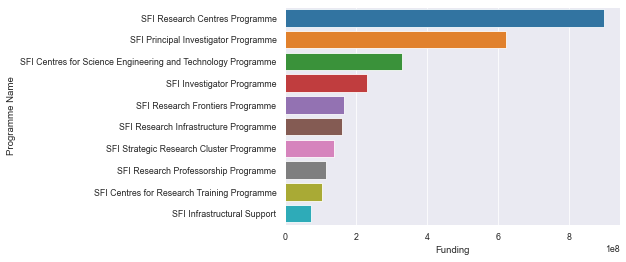

In [544]:
# Visualisation of Top 10 Funding Programmes
Plot1 = sns.barplot(x= 'Funding', y= 'Programme Name', data = TOP10Programmes) 

(B) Top HEI by Funding

In [545]:
#Identifying the Top 10 HEI by Funding
CleanAwardData.groupby("Research Body").sum().sort_values("Funding", ascending=False).head(10).reset_index() 

,Research Body,Funding,diff_years,Year
0,TCD,876579773.0,3026.879402,2544244.0
1,UCD,584160967.0,2779.454746,2365472.0
2,NUIG,503959415.0,1361.142255,1235457.0
3,UCC,452157044.0,1485.388475,1308907.0
4,UL,337698505.0,695.685743,627721.0
5,Tyndall National Institute (TNI),271182994.0,587.286529,531036.0
6,DCU,190110676.0,883.528067,919124.0
7,NUIM,106459365.0,651.301533,609051.0
8,RCSI,87642681.0,512.563571,464835.0
9,Teagasc,37986564.0,121.804007,94723.0


In [546]:
#Define Top 10 HEI
TOP10HEI = CleanAwardData.groupby("Research Body").sum().sort_values("Funding", ascending=False).head(10)

In [547]:
#Remove unwanted columns & define 
TOP10HEI_Clean = TOP10HEI.drop(['diff_years','Year'], axis=1)

<AxesSubplot:xlabel='Research Body'>

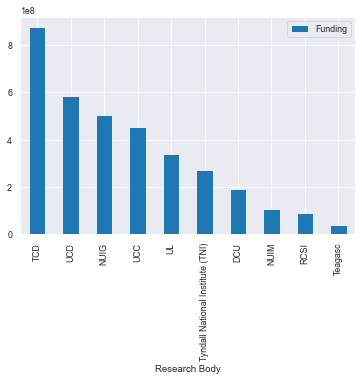

In [613]:
#Represent on a Bar Chart
TOP10HEI_Clean.groupby("Research Body").sum().sort_values("Funding", ascending=False).head(10).plot.bar()

(C) Correlation between Funding Awarded and Research Ouput 

In [551]:
#import local csv file
Publications = pd.read_csv(r'C:\Users\orla.finucane\Desktop\UCD Data Analytics Project 2021\2. Data Sets\Publications.csv')

In [552]:
Publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      object 
 1   Unnamed: 1  0 non-null      float64
 2   Overall     9 non-null      int64  
 3   2001        9 non-null      int64  
 4   2002        9 non-null      int64  
 5   2003        9 non-null      int64  
 6   2004        9 non-null      int64  
 7   2005        9 non-null      int64  
 8   2006        9 non-null      int64  
 9   2007        9 non-null      int64  
 10  2008        9 non-null      int64  
 11  2009        9 non-null      int64  
 12  2010        9 non-null      int64  
 13  2011        9 non-null      int64  
 14  2012        9 non-null      int64  
 15  2013        9 non-null      int64  
 16  2014        9 non-null      int64  
 17  2015        9 non-null      int64  
 18  2016        9 non-null      int64  
 19  2017        9 non-null      int64

In [553]:
#Identify Nulls
Publications.isnull().sum()

Unnamed: 0    0
Unnamed: 1    9
Overall       0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
2021          0
>2021         0
dtype: int64

In [554]:
Publications

,Unnamed: 0,Unnamed: 1,Overall,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,>2021
0,Dublin City University,NaN,17291,225,252,261,415,515,605,718,...,1024,1067,1011,1023,1121,998,1190,1176,1093,10
1,Maynooth University,NaN,9508,132,150,205,263,366,354,385,...,507,562,548,604,533,569,616,721,743,7
2,"National University of Ireland, Galway",NaN,26548,302,370,408,535,629,713,907,...,1515,1564,1553,1682,1781,1839,1897,2201,2206,25
3,Royal College of Surgeons in Ireland,NaN,14082,251,263,329,326,380,406,410,...,641,716,728,796,926,1015,1056,1323,1595,4
4,Teagasc - Irish Agriculture and Food Developme...,NaN,7535,125,108,137,151,251,197,248,...,437,428,421,458,507,520,577,592,630,12
5,Trinity College Dublin,NaN,49741,800,954,1134,1250,1530,1638,1832,...,2781,2753,2784,3014,3201,3350,3330,3754,3968,29
6,University College Cork,NaN,35318,623,683,783,927,1175,1335,1454,...,2016,2026,1943,2239,2259,2151,2230,2376,2553,27
7,University College Dublin,NaN,57238,870,926,1145,1413,1717,1823,2030,...,3160,3082,3220,3545,3600,3766,3954,4298,4524,53
8,University of Limerick,NaN,18585,205,282,356,442,578,564,684,...,1043,1093,1017,1165,1246,1343,1386,1489,1668,21


In [555]:
Publications['Unnamed: 0']= Publications['Unnamed: 0'].replace(['Dublin City University','Maynooth University', 'National University of Ireland, Galway','Royal College of Surgeons in Ireland','Teagasc - Irish Agriculture and Food Development Authority'
,'Trinity College Dublin','University College Cork', 'University College Dublin', 'University of Limerick'],
                                                               ['DCU','NUIM','NUIG','RCSI','Tesagasc','TCD','UCC','UCD','UL'])

In [556]:
Publications

,Unnamed: 0,Unnamed: 1,Overall,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,>2021
0,DCU,NaN,17291,225,252,261,415,515,605,718,...,1024,1067,1011,1023,1121,998,1190,1176,1093,10
1,NUIM,NaN,9508,132,150,205,263,366,354,385,...,507,562,548,604,533,569,616,721,743,7
2,NUIG,NaN,26548,302,370,408,535,629,713,907,...,1515,1564,1553,1682,1781,1839,1897,2201,2206,25
3,RCSI,NaN,14082,251,263,329,326,380,406,410,...,641,716,728,796,926,1015,1056,1323,1595,4
4,Tesagasc,NaN,7535,125,108,137,151,251,197,248,...,437,428,421,458,507,520,577,592,630,12
5,TCD,NaN,49741,800,954,1134,1250,1530,1638,1832,...,2781,2753,2784,3014,3201,3350,3330,3754,3968,29
6,UCC,NaN,35318,623,683,783,927,1175,1335,1454,...,2016,2026,1943,2239,2259,2151,2230,2376,2553,27
7,UCD,NaN,57238,870,926,1145,1413,1717,1823,2030,...,3160,3082,3220,3545,3600,3766,3954,4298,4524,53
8,UL,NaN,18585,205,282,356,442,578,564,684,...,1043,1093,1017,1165,1246,1343,1386,1489,1668,21


In [557]:
#Remove unwanted columns & define 
AllPublications = Publications.drop(['Unnamed: 1'], axis=1)

In [558]:
AllPublications

,Unnamed: 0,Overall,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,>2021
0,DCU,17291,225,252,261,415,515,605,718,767,...,1024,1067,1011,1023,1121,998,1190,1176,1093,10
1,NUIM,9508,132,150,205,263,366,354,385,353,...,507,562,548,604,533,569,616,721,743,7
2,NUIG,26548,302,370,408,535,629,713,907,1027,...,1515,1564,1553,1682,1781,1839,1897,2201,2206,25
3,RCSI,14082,251,263,329,326,380,406,410,473,...,641,716,728,796,926,1015,1056,1323,1595,4
4,Tesagasc,7535,125,108,137,151,251,197,248,255,...,437,428,421,458,507,520,577,592,630,12
5,TCD,49741,800,954,1134,1250,1530,1638,1832,1998,...,2781,2753,2784,3014,3201,3350,3330,3754,3968,29
6,UCC,35318,623,683,783,927,1175,1335,1454,1383,...,2016,2026,1943,2239,2259,2151,2230,2376,2553,27
7,UCD,57238,870,926,1145,1413,1717,1823,2030,2379,...,3160,3082,3220,3545,3600,3766,3954,4298,4524,53
8,UL,18585,205,282,356,442,578,564,684,696,...,1043,1093,1017,1165,1246,1343,1386,1489,1668,21


In [582]:
 ## Renaming Columns
AllPublicationsClean = AllPublications.rename({'Unnamed: 0' : 'Research Body'}, axis = 1)

In [583]:
AllPublicationsClean.head(1)

,Research Body,Overall,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,>2021
0,DCU,17291,225,252,261,415,515,605,718,767,...,1024,1067,1011,1023,1121,998,1190,1176,1093,10


In [585]:
# Remove Additional Columns
AllPublicationsClean.drop(AllPublicationsClean.iloc[:, 2:24], inplace = True, axis = 1)

In [586]:
AllPublicationsClean

,Research Body,Overall
0,DCU,17291
1,NUIM,9508
2,NUIG,26548
3,RCSI,14082
4,Tesagasc,7535
5,TCD,49741
6,UCC,35318
7,UCD,57238
8,UL,18585


In [599]:
TOP10HEI_Clean

,Funding
Research Body,
TCD,876579773.0
UCD,584160967.0
NUIG,503959415.0
UCC,452157044.0
UL,337698505.0
Tyndall National Institute (TNI),271182994.0
DCU,190110676.0
NUIM,106459365.0
RCSI,87642681.0


In [600]:
TOP10HEI_Clean.drop(['Tyndall National Institute (TNI)'])

,Funding
Research Body,
TCD,876579773.0
UCD,584160967.0
NUIG,503959415.0
UCC,452157044.0
UL,337698505.0
DCU,190110676.0
NUIM,106459365.0
RCSI,87642681.0
Teagasc,37986564.0


In [603]:
Funds = TOP10HEI_Clean.drop(['Tyndall National Institute (TNI)']).reset_index()

In [604]:
Funds

,Research Body,Funding
0,TCD,876579773.0
1,UCD,584160967.0
2,NUIG,503959415.0
3,UCC,452157044.0
4,UL,337698505.0
5,DCU,190110676.0
6,NUIM,106459365.0
7,RCSI,87642681.0
8,Teagasc,37986564.0


In [605]:
Funds.merge(AllPublicationsClean)

,Research Body,Funding,Overall
0,TCD,876579773.0,49741
1,UCD,584160967.0,57238
2,NUIG,503959415.0,26548
3,UCC,452157044.0,35318
4,UL,337698505.0,18585
5,DCU,190110676.0,17291
6,NUIM,106459365.0,9508
7,RCSI,87642681.0,14082


In [606]:
FundingOutput = Funds.merge(AllPublicationsClean)

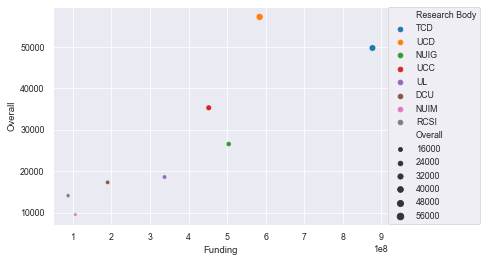

In [635]:
sns.scatterplot(x='Funding',y='Overall', data=FundingOutput, hue='Research Body', size='Overall')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

(C) Impact of Economic Changes on Research Funding in Ireland

In [375]:
# labelling time periods to group them: Group 1 "Economic Boom Years"
All_Awards.loc[((All_Awards['Year']<=2008)&(All_Awards['Year']>=2001)),"Type"]="Boom"

In [376]:
# labelling time periods to group them: Group 2 "Economic Recession"
All_Awards.loc[((All_Awards['Year']<=2014)&(All_Awards['Year']>=2009)),"Type"]="Recession"

In [377]:
# labelling time periods to group them: Group 3 "Economic Recovery"
All_Awards.loc[((All_Awards['Year']<=2019)&(All_Awards['Year']>=2015)),"Type"]="Recovery"

In [378]:
# labelling time periods to group them: Group 4 "Pandemic "
All_Awards.loc[((All_Awards['Year']<=2021)&(All_Awards['Year']>=2020)),"Type"]="Pandemic"

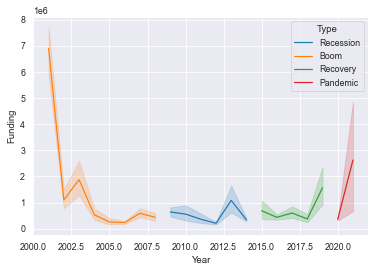

In [380]:
#Visualise funding over time using seaborn
FundingEconomicChanges = sns.lineplot(x='Year', y ='Funding', data = All_Awards, hue= 'Type')

In [382]:
All_Awards.groupby("Type").sum().sort_values("Funding", ascending=False)

,Funding,diff_years,Year
Type,,,
Recovery,1.222254e+09,3616.035921,3509493.0
Boom,1.116478e+09,4726.394108,4351084.0
Recession,8.728171e+08,4198.402431,3285082.0
Pandemic,3.448915e+08,928.383197,939379.0


In [383]:
EconomicType = All_Awards.groupby("Type").sum().sort_values("Funding", ascending=False)

In [617]:
EconomicType.drop(['diff_years','Year'], axis=1).reset_index()

,Type,Funding
0,Recovery,1.222254e+09
1,Boom,1.116478e+09
2,Recession,8.728171e+08
3,Pandemic,3.448915e+08


In [621]:
#labelling time periods to group them 2000-2010
All_Awards.loc[((All_Awards['Year']<=2010)&(All_Awards['Year']>=2000)),"Decade"]="2000-2010"

In [622]:
#labelling time periods to group them 2011-2021
All_Awards.loc[((All_Awards['Year']<=2021)&(All_Awards['Year']>=2011)),"Decade"]="2011-2021"

In [627]:
Plot3 = All_Awards.groupby("Decade").sum().sort_values("Funding", ascending=False).reset_index()

<AxesSubplot:>

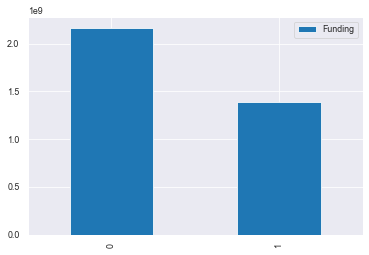

In [629]:
#Remove unwanted columns & define 
Plot3.drop(['diff_years','Year'], axis=1).plot.bar()

(D) COVID-19 and Research Funding

In [386]:
#Import from API
cv19 = requests.get('https://api.covid19api.com/summary')
cv19 = cv19.json()
pd.DataFrame(cv19['Countries']).head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,29ff13f0-babb-44ad-90f9-b7a97749487f,Afghanistan,AF,afghanistan,15,156911,0,7365,0,0,2021-11-23T14:10:52.179Z,{}
1,703aab72-767a-4997-a75b-2fb854ee41a4,Albania,AL,albania,623,196611,14,3049,0,0,2021-11-23T14:10:52.179Z,{}
2,0fb3a2da-ac00-46de-bdcc-ee7209fabbee,Algeria,DZ,algeria,159,209111,5,6026,0,0,2021-11-23T14:10:52.179Z,{}
3,00498d9d-fd0f-41ad-a4fa-a39e8608657a,Andorra,AD,andorra,213,16299,0,130,0,0,2021-11-23T14:10:52.179Z,{}
4,3112de50-b15d-418f-aa22-b39cea8c5aab,Angola,AO,angola,0,65024,0,1730,0,0,2021-11-23T14:10:52.179Z,{}


In [387]:
COVID19 = pd.DataFrame(cv19['Countries'])

In [388]:
#Impact of COVID in Ireland
COVID19[COVID19["Country"]=="Ireland"]

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
80,855ea10c-8aa2-4f3e-b9b8-af7fb1530d0b,Ireland,IE,ireland,5630,534594,0,5609,0,0,2021-11-23T14:10:52.179Z,{}
